# Investigating factors contributiong to the Coronary Heart Disease in the Western Cape
 


## Setup
### Load Packages

In [1]:
import pickle
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as ss
from pandas.plotting import scatter_matrix
import seaborn as sns
import pandas.testing as pdt
import scipy.stats as ss
import numpy.testing as npt
import pandas.testing as pdt

sns.set_style("darkgrid")

/home/tas/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


## Load Data

In [2]:
#read data
data = pd.read_csv('Cardiovascular.csv',index_col = 'ind',sep = ';')
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
ind,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1




## Executive Summary \ Highlights

The purpose of this notebook is to investigate factors that contribute to heart-disease in the high-risk region of the Western Cape, South Africa.

This is archieved by modelling response variable like systolic blood pressure, cumulative tobacco, low density lipoprotein cholesterol, family history of heart disease, type-A behavior, obesity, adiposity, current alcohol consumption and age against coronary heart disease.

The limitaions we encountered are :<br/>
    &nbsp; &nbsp; &nbsp; &nbsp; 1) The observations are low 426 compared to the population of Western Cape<br/>
    &nbsp; &nbsp; &nbsp; &nbsp; 2) The dataset may not reflect the majority of the Western Cape population as it        was taken from a small sample of population.<br/>
    &nbsp; &nbsp; &nbsp; &nbsp; 3) The dataset may be outdated as the data was collected in 1983


## Introduction

A three-community study of rural Afrikaans-speaking Whites in the south-western Cape revealed that the major reversible risk factors hypercholesterolaemia, hypertension and smoking, as well as 'minor' factors such as inactivity, obesity, hyperuricaemia, coronary-prone behaviour and the irreversible risk factors of chest pain, ischaemic changes on the ECG and a family history of ischaemic heart disease (IHD), were exceedingly common. Singly or in combination, the major risk factors were present in the great majority of the study population after the age of 44 years. The interaction of high levels of lifestyle-induced risk factors with constitutional predisposition could adequately explain any excess risk of IHD in the Afrikaans-speaking community. The almost universal risk factor prevalence in this study has major implications for any preventive strategy.

Our Question aims to further investigate the relationship between the responsive variable and the factors(features) contributing towards a person having coronary heart disease, thus giving us the knowledge to take suitable action to prevent any risks in having a coronary heart disease.

### Methology
A brief overview of the methodology is as follows:<br/>
1) Read in data <br/>

2) Encode variables <br/>
    &nbsp; &nbsp; &nbsp; &nbsp; *Encode the family history so it shows numbers instead of the words, that way we       can be able to plot family history attribute<br/>
        &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; *Present = 1<br/>
        &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; *Absent = 0
     
3) Exploratory plots <br/>
    &nbsp; &nbsp; &nbsp; &nbsp; *Put Exploratory graphs<br/>
    &nbsp; &nbsp; &nbsp; &nbsp; *Calculate statistic figures:<br/>
         &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; eg. Mean, std, min, max and percentiles


## Research question
### Does excessive use of tobacco usage lead to coronary heart disease? Compared to other causal factors of the disease, does it have a stronger association with coronary heart disease?


## Data Description

A retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of coronary heart disease. Many of the coronary heart disease positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their coronary heart disease event. In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in Rousseauw et al, 1983, South African Medical Journal.

A data frame with 462 observations on the following 10 variables.

sbp = systolic blood pressure

tobacco = cumulative tobacco (kg)

ldl = low density lipoprotein cholesterol

adiposity = a numeric vector

famhist = family history of heart disease, a factor with levels "Absent" and "Present"

typea = type-A behavior

obesity = a numeric vector

alcohol = current alcohol consumption

age = age at onset

chd = response, coronary heart disease, a factor with levels "Absent = 0" and "Present = 1"

This dataset is published by SAheart: South African Hearth Disease Data.

The source is Rousseauw, J., du Plessis, J., Benade, A., Jordaan, P., Kotze, J. and Ferreira, J. (1983). Coronary risk factor screening in three rural communities, South African Medical Journal 64: 430–436. ElemStatLearn, R-Package




In [3]:
##Encode the family history so it shows numbers instead of the words, that way we can be able to plot family history attribute
def encode(s):
    s = s.lower()
    if s == 'present':
        return 1
    return 0
try:
    data.famhist = data.famhist.apply(encode)
except:
    print("Already encoded")
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
ind,,,,,,,,,,
1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


<h3><b>Visualization of the relationships between the different features of the dataset:</b></h3>
<blockqoute>
Here we show the relationships among the different features of the dataset. Scatterplots and histograms were used to help better show these relationships.
</blockqoute>

<Figure size 86400x86400 with 0 Axes>

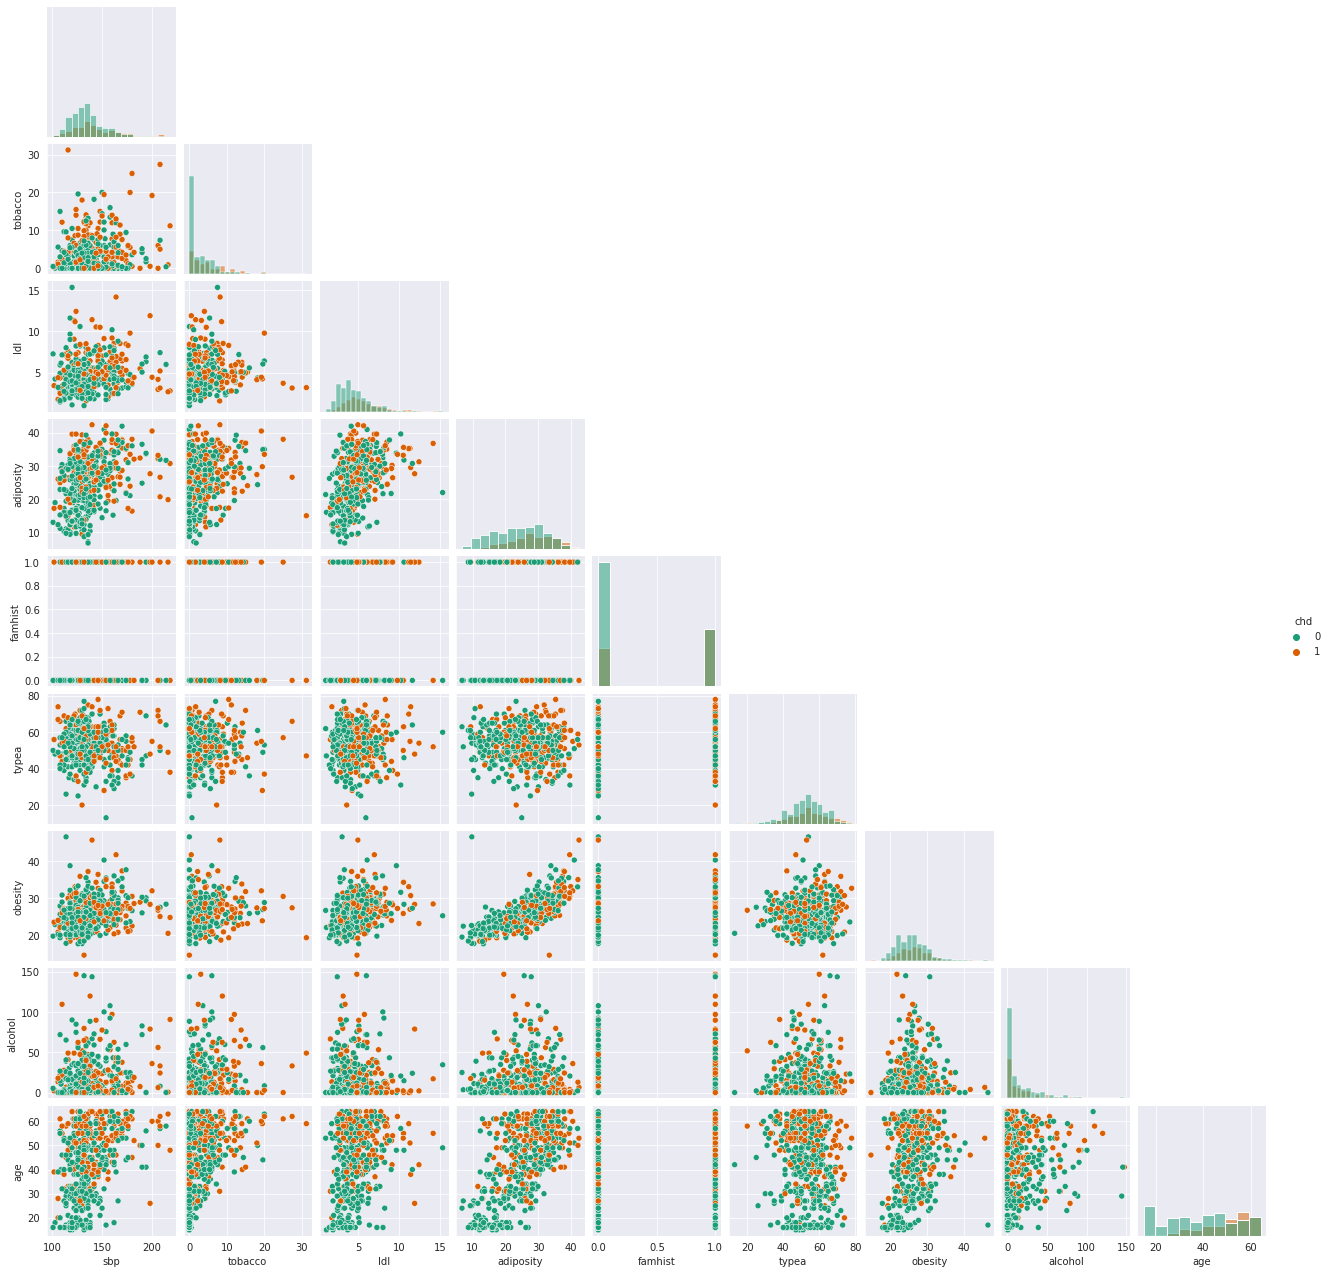

In [4]:
plt.figure(figsize=(1200, 1200))
mat_plot = sns.pairplot(data,hue='chd',diag_kind="hist",palette='Dark2',corner=True, height = 2)
plt.show()

In [5]:
cov_matrix = data.cov()
cov_matrix

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
sbp,420.099018,19.980904,6.719048,56.853088,0.866045,-11.561146,20.560605,70.295979,116.409504,1.877886
tobacco,19.980904,21.095870,1.511467,10.243648,0.200771,-0.658701,2.410084,22.579878,30.216833,0.655697
ldl,6.719048,1.511467,4.288665,7.096730,0.164854,0.895541,2.884043,-1.693487,9.433118,0.259475
adiposity,56.853088,10.243648,7.096730,60.539271,0.697565,-3.295625,23.492566,19.110856,71.150916,0.941785
famhist,0.866045,0.200771,0.164854,0.697565,0.243401,0.217032,0.240305,0.972508,1.727385,0.064005
typea,-11.561146,-0.658701,0.895541,-3.295625,0.217032,96.383976,3.061481,9.493078,-14.716201,0.482379
obesity,20.560605,2.410084,2.884043,23.492566,0.240305,3.061481,17.755101,5.324835,17.961062,0.200894
alcohol,70.295979,22.579878,-1.693487,19.110856,0.972508,9.493078,5.324835,599.322235,36.166493,0.729147
age,116.409504,30.216833,9.433118,71.150916,1.727385,-14.716201,17.961062,36.166493,213.421608,2.595309
chd,1.877886,0.655697,0.259475,0.941785,0.064005,0.482379,0.200894,0.729147,2.595309,0.226874


In [6]:
data.corr()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
sbp,1.000000,0.212247,0.158296,0.356500,0.085645,-0.057454,0.238067,0.140096,0.388771,0.192354
tobacco,0.212247,1.000000,0.158905,0.286640,0.088601,-0.014608,0.124529,0.200813,0.450330,0.299718
ldl,0.158296,0.158905,1.000000,0.440432,0.161353,0.044048,0.330506,-0.033403,0.311799,0.263053
adiposity,0.356500,0.286640,0.440432,1.000000,0.181721,-0.043144,0.716556,0.100330,0.625954,0.254121
famhist,0.085645,0.088601,0.161353,0.181721,1.000000,0.044809,0.115595,0.080520,0.239667,0.272373
typea,-0.057454,-0.014608,0.044048,-0.043144,0.044809,1.000000,0.074006,0.039498,-0.102606,0.103156
obesity,0.238067,0.124529,0.330506,0.716556,0.115595,0.074006,1.000000,0.051620,0.291777,0.100095
alcohol,0.140096,0.200813,-0.033403,0.100330,0.080520,0.039498,0.051620,1.000000,0.101125,0.062531
age,0.388771,0.450330,0.311799,0.625954,0.239667,-0.102606,0.291777,0.101125,1.000000,0.372973
chd,0.192354,0.299718,0.263053,0.254121,0.272373,0.103156,0.100095,0.062531,0.372973,1.000000


<h3> <b> Intepretation of the covariance matrix and the correlation matrix: </b></h3>
<blockqoute> 
The coronary heart disease have a weak linear relationship with the predictive variables chosen i.e. tobacco, low density lipoprotein cholesterol, adiposity, family history of heart disease, type A behaviour, obesity, alcohol and age. Compared to the rest of the linear relationship it have with other predictive variables, it has a stronger linear relationship with age. Tobacco is the second predictive variable that has a stronger linear relationship with coronary heart disease.
<\blockqoute>

In [7]:
data.describe()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


<h3><b> Identifying outliers using box plots: </b></h3>
<blockqoute>
Here we plot box plots in order be able to identify and visualize the outliers in the different dataset attributes. Adisposity and age do not have any outliers. Several outliers from the other variable can be seen.
</blockqoute>

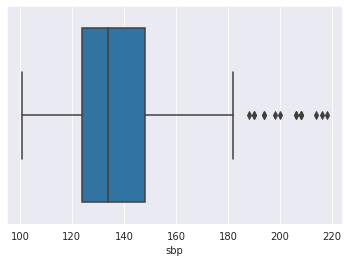

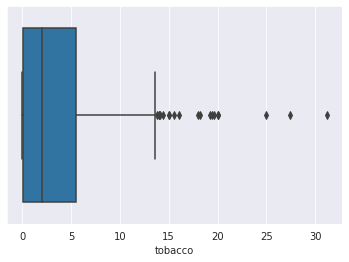

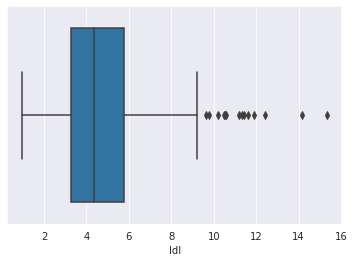

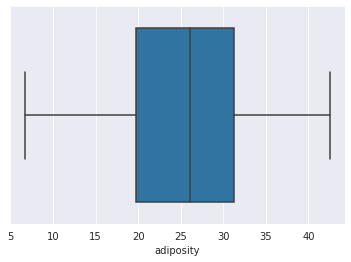

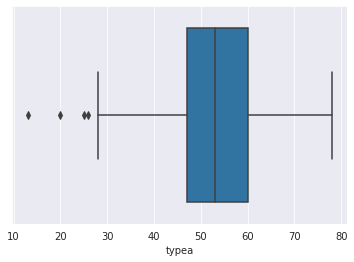

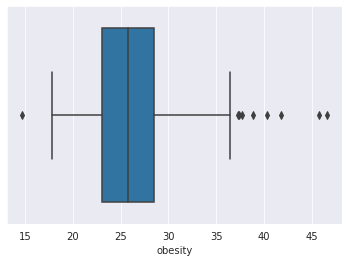

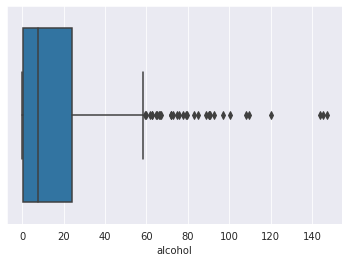

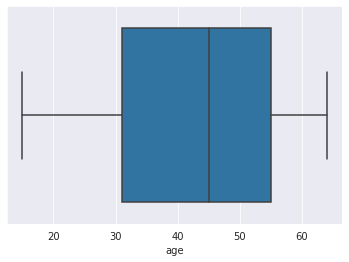

In [8]:
##Box plots for each feature

features = data.columns[0:9]

##Remove family history
features = features.drop(['famhist'])
for f in features:
    sns.boxplot(x=data[f])
    plt.show()